In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\programdata\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np

from matplotlib import style
style.use("fivethirtyeight")

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# CREATE X VALUES
X = df.drop('koi_disposition', axis=1)
X.head()
## For test
# X = X.head(50)
# X = X.values.tolist()
# X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
# CREATE y VALUES
# Use `koi_disposition` for the y values
# Assign koi_disposition to y
Y = df[['koi_disposition']]

# 200 samples for test
# Y = Y.head(50)

# # Assign koi_disposition to y and Remove spaces btw words
# Y = df['koi_disposition'].apply(lambda str : str.replace(" ", ""))

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = Y.apply(le.fit_transform)
y = old_y

# # # Change the shape of y v1
# new_y = np.array(old_y)
# y = new_y.reshape(-1, 1) 

y

# # Change the shape of y v2
# new_y = np.array(old_y)
# y = new_y
# y = new_y.ravel()

# LABEL ENCODE Y v2
# Apply labelencoder object on columns
# labelencoder.fit_transform(data.ix[:, 1:])   # First column does not need to be encoded

,koi_disposition
0,1
1,2
2,2
3,1
4,1
...,...
6986,2
6987,2
6988,0
6989,2


# Create a Train Test Split

In [7]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [8]:
# Fit the scaler with the training data
X_scaler = StandardScaler().fit(X_train)

# after fitting the scaler with the training data, we transform the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
print(y_train_categorical[:10])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


## Creating Model

In [10]:
from keras.models import Sequential
model03 = Sequential()

In [11]:
from keras.layers import Dense

#variables to define the number of input nodes and the number of nodes in the hidden layer
number_inputs = 40
number_hidden_nodes = 20
model03.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

In [12]:
number_classes = 3

# CRITICAL: softmax is an activation function FOR CLASSIFICATION. 
# This activation function should be used in the output layer to convert our model's outputs to probabilities.
model03.add(Dense(units=number_classes, activation='softmax'))

In [13]:
model03.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
Total params: 883
Trainable params: 883
Non-trainable params: 0
_________________________________________________________________


In [14]:
# from ann_visualizer.visualize import ann_viz

# ann_viz(model03, title='My First Neural Network', filename="network")

In [15]:
# Hint: your output layer in this example is using software for logistic regression (categorical)
model03.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [16]:
# Fit (train) the model
model_history = model03.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=250,
    shuffle=True,
    verbose=2
)

Epoch 1/250
164/164 - 4s - loss: 0.8226 - accuracy: 0.6361
Epoch 2/250
164/164 - 0s - loss: 0.4845 - accuracy: 0.8186
Epoch 3/250
164/164 - 0s - loss: 0.3874 - accuracy: 0.8518
Epoch 4/250
164/164 - 0s - loss: 0.3435 - accuracy: 0.8640
Epoch 5/250
164/164 - 0s - loss: 0.3198 - accuracy: 0.8730
Epoch 6/250
164/164 - 0s - loss: 0.3063 - accuracy: 0.8716
Epoch 7/250
164/164 - 0s - loss: 0.2973 - accuracy: 0.8776
Epoch 8/250
164/164 - 0s - loss: 0.2904 - accuracy: 0.8779
Epoch 9/250
164/164 - 0s - loss: 0.2855 - accuracy: 0.8796
Epoch 10/250
164/164 - 0s - loss: 0.2803 - accuracy: 0.8842
Epoch 11/250
164/164 - 0s - loss: 0.2780 - accuracy: 0.8827
Epoch 12/250
164/164 - 0s - loss: 0.2741 - accuracy: 0.8863
Epoch 13/250
164/164 - 0s - loss: 0.2705 - accuracy: 0.8844
Epoch 14/250
164/164 - 0s - loss: 0.2677 - accuracy: 0.8890
Epoch 15/250
164/164 - 0s - loss: 0.2641 - accuracy: 0.8873
Epoch 16/250
164/164 - 0s - loss: 0.2617 - accuracy: 0.8917
Epoch 17/250
164/164 - 0s - loss: 0.2606 - accura

## Quantifying the Model

In [17]:
model_loss, model_accuracy = model03.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.2554 - accuracy: 0.8976
Loss: 0.255377858877182, Accuracy: 0.8975972533226013


Text(0.5, 1.0, 'Accuracy')

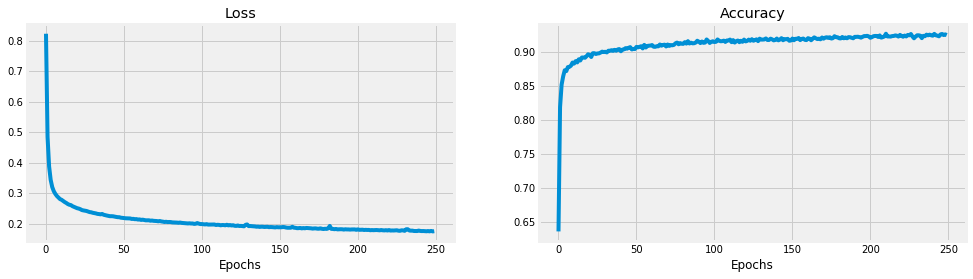

In [18]:
### Plot The model's learning history
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(model_history.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(model_history.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

In [19]:
### Making Predictions with new data
import numpy as np
# new_data = X_scaler.transform(np.array([[-1.2, 0.3, 0.4]]))
new_data = X_scaler.transform(X_test)
print(f"Model output: {model03.predict(new_data)}")
print(f"Predicted class: {np.argmax(model03.predict(new_data))}")

Model output: [[9.9998832e-01 4.1685012e-06 7.5013418e-06]
 [1.3257434e-04 1.1469765e-04 9.9975270e-01]
 [2.4281250e-15 1.8992212e-10 1.0000000e+00]
 ...
 [8.1939707e-03 8.2237897e-03 9.8358226e-01]
 [1.1232988e-06 1.5865806e-02 9.8413312e-01]
 [3.4232572e-02 9.6576750e-01 6.3191334e-11]]
Predicted class: 8


In [20]:
### View prediction probabilities
import pandas as pd
predictions = np.argmax(model03.predict(X_test_scaled), axis=1)
probs = model03.predict(X_test_scaled)

# Change the shape of y v1
old_y_test = y_test
new_y_test = np.array(old_y_test)
y_test = new_y_test.reshape(-1, 1) 
y_test
y_test_df = y_test.ravel()
y_test_df


pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test_df, 
    "P(0)": np.round(probs[:, 0], 5),
   "P(1)": np.round(probs[:, 1], 5)
    })

pred_df.head(25)

,Prediction,Actual,P(0),P(1)
0,0,0,0.99999,0.00000
1,2,2,0.00013,0.00011
2,2,2,0.00000,0.00000
3,2,2,0.00000,0.00000
4,0,0,0.96220,0.03780
5,2,2,0.00000,0.00000
6,0,0,1.00000,0.00000
7,2,2,0.00000,0.00000
8,2,2,0.00000,0.00000
9,2,2,0.00003,0.00000


## Save the Model

In [21]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Model03_NNModel.sav'
joblib.dump(model03, filename)

TypeError: can't pickle weakref objects